<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://github.com/ultralytics/assets/raw/master/yolov5/v62/splash_readme.png"></a>


<br>
  <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
<br>

This <a href="https://github.com/ultralytics/yolov5">YOLOv5</a> 🚀 notebook by <a href="https://ultralytics.com">Ultralytics</a> presents simple train, validate and predict examples to help start your AI adventure.<br>See <a href="https://github.com/ultralytics/yolov5/issues/new/choose">GitHub</a> for community support or <a href="https://ultralytics.com/contact">contact us</a> for professional support.

</div>

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [1]:
# !git clone https://github.com/ultralytics/yolov5  # clone
# %cd yolov5
# %pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5  v6.2-239-gf33718f3 Python-3.10.6 torch-1.13.0 CUDA:0 (NVIDIA GeForce GTX 1660 Ti with Max-Q Design, 6144MiB)


Setup complete  (16 CPUs, 15.4 GB RAM, 339.8/683.6 GB disk)


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                          'path/*.jpg'  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [19]:
!python detect.py --weights D:/Sem-5/LAB/ANPR/ran_on_colab/best960.pt --img 960 --conf 0.50 --source D:/Sem-5/LAB/ANPR/customtest --save-crop 
# display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['D:/Sem-5/LAB/ANPR/ran_on_colab/best960.pt'], source=D:/Sem-5/LAB/ANPR/customtest, data=data\coco128.yaml, imgsz=[960, 960], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v6.2-239-gf33718f3 Python-3.10.6 torch-1.13.0 CUDA:0 (NVIDIA GeForce GTX 1660 Ti with Max-Q Design, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 D:\Sem-5\LAB\ANPR\customtest\IMG_20221124_174646.jpg: 960x736 1 number_plate, 50.0ms
image 2/5 D:\Sem-5\LAB\ANPR\customtest\IMG_20221124_174650.jpg: 960x736 1 number_plate, 17.0ms
image 3/5 D:\Sem-5\LAB\ANPR\customtest\IMG_20221124_174720.jpg: 960x736 1 number_plate, 17.0ms
image 4/5 D:\S

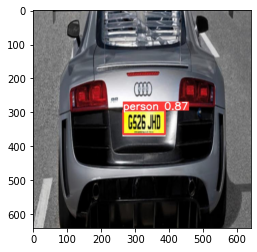

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('/content/yolov5/runs/detect/exp6/Cars301_png.rf.aaf6c0fbc45249978f5d55d785ea4698.jpg')
image_np = np.array(img)
plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
plt.show()

In [49]:
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

In [70]:
def count(str1 ,str2) :
    # set of characters of string1
    set_string1 = set(str1)
 
    # set of characters of string2
    set_string2 = set(str2)
 
    # using (&) intersection mathematical operation on sets
    # the unique characters present in both the strings
    # are stored in matched_characters set variable
    matched_characters = set_string1 & set_string2
 
    # printing the length of matched_characters set
    # gives the no. of matched characters
    return(len(matched_characters))  
# print(count('KFI9XXA', 'KFI9XXA'))

# FOR FORIEGN CARS

In [71]:
import easyocr
import os
import re
regex = re.compile('[@_!#$%^&*()<>?/\|}{~:]')
res=set()
directory = "D:\\Sem-5\\LAB\\ANPR\\yolov5\\runs\\detect\\exp5\\crops\\number_plate"
reader=easyocr.Reader(['en'])
for filename in os.listdir(directory):
    # if filename.endswith(".jpg"):
    path = os.path.join(directory, filename)
    result=reader.readtext(path)
    m=0
    try:
        myown=result[-1][-2]
    except:
        continue
    else:
        myown=myown.replace(" ","")
        if(regex.search(myown) == None and has_numbers(myown) and len(myown)==7 and has_numbers(myown[3])):
            myown=myown.upper()
            for i in res:
                # print(i)
                # print(myown)
                # print(count(i,myown))
                m=max(m,count(i,myown))
            # print(m)
            if(m<3):
                print(myown)
                res.add(myown)
            # print(myown)
        # if(i==293):
        #   print(result)
        # print(i,result)
        # i+=1
# result=reader.readtext('/content/yolov5/runs/detect/exp3/crops/number_plate/good.jpg')
# print(result[-1][-2])
res

KFI9XXA
LL59ONH
ABI3ALB


{'ABI3ALB', 'KFI9XXA', 'LL59ONH'}

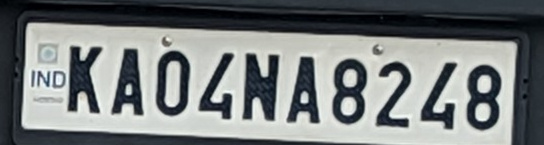

<class 'PIL.JpegImagePlugin.JpegImageFile'>


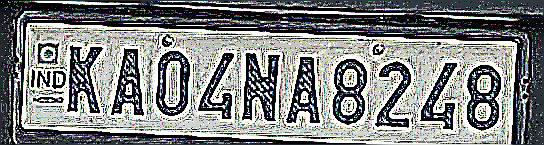

<class 'PIL.Image.Image'>


In [17]:
from PIL import Image, ImageEnhance

im = Image.open("D:\\Sem-5\\LAB\\ANPR\\yolov5\\runs\\detect\\exp7\\crops\\number_plate\\custom.jpg")
enhancer = ImageEnhance.Sharpness(im)
display(im)
print(type(im))
factor = 100
im_s_1 = enhancer.enhance(factor)
display(im_s_1)
print(type(im_s_1))

# FOR INDIAN CARS

In [20]:
import easyocr
import pandas as pd
# from PIL import Image, ImageEnhance
# and not df.isin([state_code,number_plate]).any().any()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

reader=easyocr.Reader(['en'])
directory = "D:\\Sem-5\\LAB\\ANPR\\yolov5\\runs\\detect\\exp10\\crops\\number_plate"
reader=easyocr.Reader(['en'])

df = pd.DataFrame(columns=['State Code', 'Number Plate'])
for filename in os.listdir(directory):
    # if filename.endswith(".jpg"):
    path = os.path.join(directory, filename)
    result=reader.readtext(path)
    # print(result[-1][-2])
    if((len(result[-1][-2]))>5):
        try:
            result=result[-1][-2].upper()
            result=result.replace(" ","")
            state_code=result[0:2]
            number_plate=result[-4:]
            number_plate=number_plate.replace("O","0")
            # print(result)

            if(state_code.isalpha() and number_plate.isdecimal()):
                # print(state_code,number_plate)
                df = df.append({'State Code': state_code, 'Number Plate': number_plate}, ignore_index=True)
        except:
            pass
df

,State Code,Number Plate
0,KA,3976
1,MH,9821
2,KA,2579
3,KA,0056
4,KA,8248


In [24]:
x=[([[20, 5], [247, 5], [247, 65], [20, 65]], 'SN66 XMZ', 0.7249553987262917)]
x[-1][-2]

'SN66 XMZ'

# 2. Validate
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

  0%|          | 0.00/780M [00:00<?, ?B/s]

In [ ]:
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 960 --batch 8 --epochs 40 --data drive.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=drive.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=8, imgsz=960, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 8 (delta 3), reused 8 (delta 3), pack-reused 0
Unpacking objects: 100% (8/8), done.
From https://github.com/ultralytics/yolov5
   1f74c88..9a56ce6  exp11      -> origin/exp11
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-239-gf33718f Python-

# 4. Visualize

## Comet Logging and Visualization 🌟 NEW
[Comet](https://bit.ly/yolov5-readme-comet) is now fully integrated with YOLOv5. Track and visualize model metrics in real time, save your hyperparameters, datasets, and model checkpoints, and visualize your model predictions with [Comet Custom Panels](https://bit.ly/yolov5-colab-comet-panels)! Comet makes sure you never lose track of your work and makes it easy to share results and collaborate across teams of all sizes! 

Getting started is easy:
```shell
pip install comet_ml  # 1. install
export COMET_API_KEY=<Your API Key>  # 2. paste API key
python train.py --img 640 --epochs 3 --data coco128.yaml --weights yolov5s.pt  # 3. train
```

To learn more about all of the supported Comet features for this integration, check out the [Comet Tutorial](https://github.com/ultralytics/yolov5/tree/master/utils/loggers/comet). If you'd like to learn more about Comet, head over to our [documentation](https://bit.ly/yolov5-colab-comet-docs). Get started by trying out the Comet Colab Notebook:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1RG0WOQyxlDlo5Km8GogJpIEJlg_5lyYO?usp=sharing)

<img width="1920" alt="yolo-ui" src="https://user-images.githubusercontent.com/7529846/187608607-ff89c3d5-1b8b-4743-a974-9275301b0524.png">

## ClearML Logging and Automation 🌟 NEW

[ClearML](https://cutt.ly/yolov5-notebook-clearml) is completely integrated into YOLOv5 to track your experimentation, manage dataset versions and even remotely execute training runs. To enable ClearML (check cells above):

- `pip install clearml`
- run `clearml-init` to connect to a ClearML server (**deploy your own [open-source server](https://github.com/allegroai/clearml-server)**, or use our [free hosted server](https://cutt.ly/yolov5-notebook-clearml))

You'll get all the great expected features from an experiment manager: live updates, model upload, experiment comparison etc. but ClearML also tracks uncommitted changes and installed packages for example. Thanks to that ClearML Tasks (which is what we call experiments) are also reproducible on different machines! With only 1 extra line, we can schedule a YOLOv5 training task on a queue to be executed by any number of ClearML Agents (workers).

You can use ClearML Data to version your dataset and then pass it to YOLOv5 simply using its unique ID. This will help you keep track of your data without adding extra hassle. Explore the [ClearML Tutorial](https://github.com/ultralytics/yolov5/tree/master/utils/loggers/clearml) for details!

<a href="https://cutt.ly/yolov5-notebook-clearml">
<img alt="ClearML Experiment Management UI" src="https://github.com/thepycoder/clearml_screenshots/raw/main/scalars.jpg" width="1280"/></a>

## Local Logging

Training results are automatically logged with [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) loggers to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc.

This directory contains train and val statistics, mosaics, labels, predictions and augmentated mosaics, as well as metrics and charts including precision-recall (PR) curves and confusion matrices. 

<img alt="Local logging results" src="https://user-images.githubusercontent.com/26833433/183222430-e1abd1b7-782c-4cde-b04d-ad52926bf818.jpg" width="1280"/>


# Environments



# Status

![YOLOv5 CI](https://github.com/ultralytics/yolov5/actions/workflows/ci-testing.yml/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on macOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Additional content below.

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # yolov5n - yolov5x6 or custom
im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.